# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

Before we start, we'd better clarify some points:
1) 'age' - target variable
2) others - features
Predicated on 2 points above, we are going to plough through interdependencies between age and every other single feature.

In order to begin the project, first and foremost we need to get aware of the data. It's commonplace to use EDA - the set of approaches intended to simplify further scrutiny.

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()
abalone = pd.read_csv('./data/abalone.csv')



Having uploaded the dataset, let the game begin!

In [12]:
print(abalone.head())

  sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0   M   0.455     0.365   0.095    0.5140      0.2245      0.1010     0.150   
1   M   0.350     0.265   0.090    0.2255      0.0995      0.0485     0.070   
2   F   0.530     0.420   0.135    0.6770      0.2565      0.1415     0.210   
3   M   0.440     0.365   0.125    0.5160      0.2155      0.1140     0.155   
4   I   0.330     0.255   0.080    0.2050      0.0895      0.0395     0.055   

   rings   age  
0     15  16.5  
1      7   8.5  
2      9  10.5  
3     10  11.5  
4      7   8.5  


In the light of the above, we could imagine two datatypes - numeric and boolean-like (M/F/I). However, we'll comfirm (or shatter) this suggestion in the next part.

In [13]:
print(abalone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None


What we discovered, is that there're 9 cols of numeric type (float and int) and one is an object one.
The first instinct is to say that this set is ok, while actually the trick, broadly speaking, is veneered in the very first column - sex. It may well encompass some unacceptable values. So, we need to double check it.

In [14]:
unique_sex=abalone.sex.unique()
print(unique_sex)

['M' 'F' 'I']


Unlike our expectations, it contains only valid values.

It's high time we looked through the set on null values.

In [15]:
null_abalone=abalone[abalone.isnull().any(axis=1)]
print(null_abalone)

Empty DataFrame
Columns: [sex, length, diameter, height, whole_wt, shucked_wt, viscera_wt, shell_wt, rings, age]
Index: []


Great! There're no null values which ends up being slightly easier but not less engaging.

As we have the only categorical variable (feature) - SEX - we'd better start from here.

It's a norm to deploy bar plot type for getting features visualized.

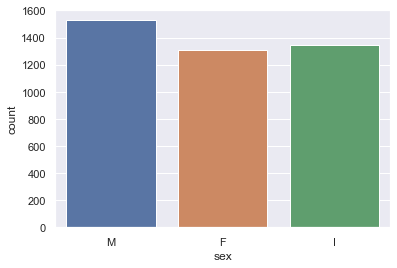

In [19]:
sns.countplot(x='sex', data=abalone);

Let's proceed with quantitive data exploration.
In the first place, let's calculate central tendency by aggregating a set of values on single feature. For this purpose, .describe() method is applied.

In [16]:
print(abalone.describe())

            length     diameter       height     whole_wt   shucked_wt  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.221963   
min       0.075000     0.055000     0.000000     0.002000     0.001000   
25%       0.450000     0.350000     0.115000     0.441500     0.186000   
50%       0.545000     0.425000     0.140000     0.799500     0.336000   
75%       0.615000     0.480000     0.165000     1.153000     0.502000   
max       0.815000     0.650000     1.130000     2.825500     1.488000   

        viscera_wt     shell_wt        rings          age  
count  4177.000000  4177.000000  4177.000000  4177.000000  
mean      0.180594     0.238831     9.933684    11.433684  
std       0.109614     0.139203     3.224169     3.224169  
min       0.000500     0.001500     1.000000     2.500000  
25%       0.093500     0.130000  

At the moment, it looks extra bulky. Let's take a dive into 'length' column. I suggest that we complement the results with mean, median and mode values. Along with distribution visualization.

Mean: 0.5239920995930094
Median: 0.545
Mode: 0    0.550
1    0.625
dtype: float64


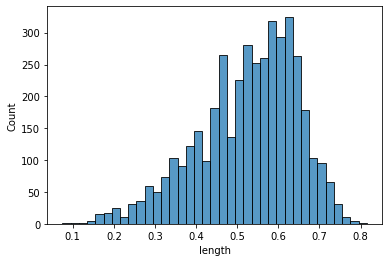

In [17]:
length_mean=abalone.length.mean()
print("Mean: "+ str(length_mean))

length_median=abalone.length.median()
print("Median: " + str(length_median))

length_mode=abalone.length.mode()
print("Mode: " + str(length_mode))

import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(x='length',data=abalone)
plt.show()

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!